# --**Importing libraries for data importation**

In [96]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

# **--Checking for file directory**

In [101]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ahdd1/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/csvTestLabel 10k x 1.csv
/kaggle/input/ahdd1/csvTrainLabel 60k x 1.csv
/kaggle/input/ahdd1/Train + Test Matlab.mat
/kaggle/input/ahdd1/csvTestImages 10k x 784.csv
/kaggle/input/ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv


In [149]:
# Load the data
X_train = pd.read_csv("../input/ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv")
Y_train = pd.read_csv("../input/ahdd1/csvTrainLabel 60k x 1.csv")
X_test = pd.read_csv("../input/ahdd1/csvTestImages 10k x 784.csv")
y_test = pd.read_csv("../input/ahdd1/csvTestLabel 10k x 1.csv")

In [103]:
'Each of the images in the dataset are of shape {} x {}'.format(np.sqrt(X_train.shape[1]), np.sqrt(X_train.shape[1]))

'Each of the images in the dataset are of shape 28.0 x 28.0'

# **--appearance of each class in the dataset**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
0    5999
Name: 0, dtype: int64

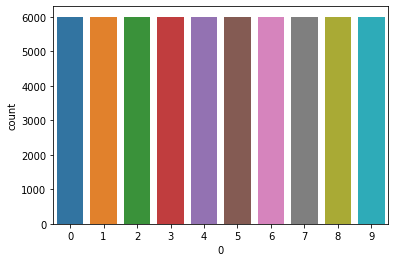

In [104]:
#plot Count numbers
Y_train=Y_train.iloc[:,0]
y_test=y_test.iloc[:,0]
g = sns.countplot(Y_train)

Y_train.value_counts()

# **--Creating a function for data exploration and wrangling**

In [98]:
def log_print(X, y, tag='Train'):
  print(f'X {tag} shape = {X.shape}')
  print(f'y {tag} shape = {y.shape}')
     
    
def flatten(X):
  X_data = X.reshape(X.shape[0], -1)
  return X_data

def plot_images(X, y):
  plt.figure(figsize=(10,10))
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i])
    plt.title(y[i])
  plt.show()

def trim_data(X, y, ns):   
  X = X[:ns]
  y = y[:ns]
  return X, y

In [97]:
log_print(X_train, Y_train)
log_print(X_test, y_test)

X Train shape = (59999, 28, 28, 1)
y Train shape = (59999,)
X Train shape = (9999, 28, 28, 1)
y Train shape = (9999,)


# **--Normalizing the data**

In [150]:
X_train = X_train/255.
X_test = X_test/255.
X_train=X_train.values.reshape(-1, 28,28,1)
X_test=X_test.values.reshape(-1, 28, 28, 1)

# **--Data Visualization**

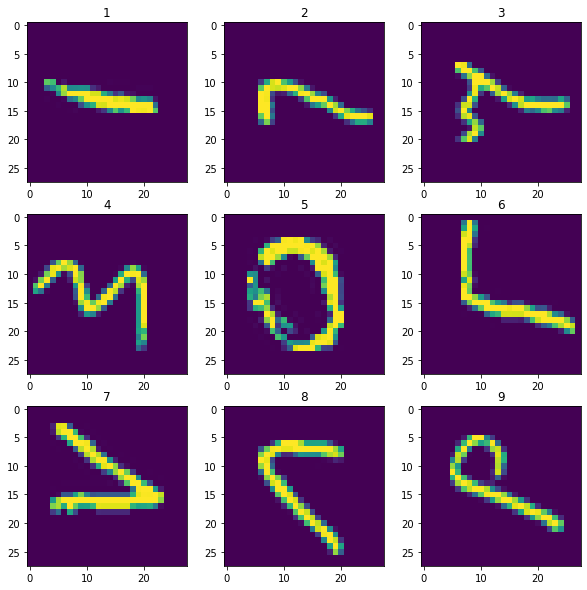

In [106]:
plot_images(X_train, Y_train)

# **--Data Visualization- sample**

In [151]:
X_train_flat = flatten(X_train)
X_test_flat = flatten(X_test)

In [152]:
ntrain_s = 500
ntest_s = 50

X_train_tr, Y_train_tr = trim_data(X_train_flat, Y_train, ntrain_s)
X_test_tr, y_test_tr = trim_data(X_test_flat, y_test, ntest_s)

log_print(X_train_tr, Y_train_tr, tag='Train')
log_print(X_test_tr, y_test_tr, tag='Test')

X Train shape = (500, 784)
y Train shape = (500, 1)
X Test shape = (50, 784)
y Test shape = (50, 1)


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf 
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from keras.utils.np_utils import to_categorical

# **--Split data to training and validation**

In [174]:
Y_train = to_categorical(Y_train, num_classes = 10)
y_test  = to_categorical(y_test , num_classes = 10)

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=4)

In [146]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(48599, 28, 28, 1)
(48599, 10)
(5400, 28, 28, 1)
(5400, 10)


# **--importing libraries for Machine Learning**

In [164]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist

# **--Modelling  using CNN**

In [118]:
model = Sequential()

model.add(Conv2D(filters = 80, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128, activation = "relu"))

model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 80)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 80)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 80)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        128064    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

# **Outlook Model**

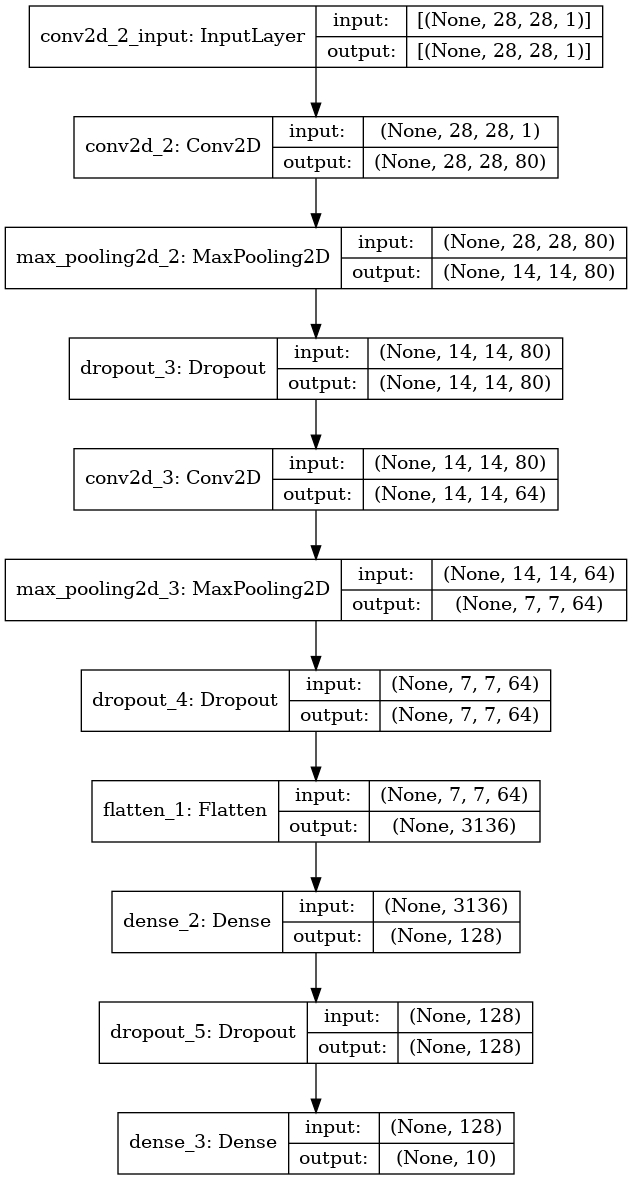

In [119]:
# print out model look
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

# **--Define optimizer**

In [120]:
optimizer = SGD(lr=0.001, momentum=0.30)

# **--Compile the model**

In [121]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# **--Fit the model**

In [129]:
history = model.fit(
          X_train,
          Y_train,
          epochs=10,
          #validation_data = (X_test, y_test),
          #verbose='sigmoid'
)

Epoch 1/10
1688/1688 [==============================] - 142s 84ms/step - loss: 1.4065 - accuracy: 0.5670
Epoch 2/10
1688/1688 [==============================] - 142s 84ms/step - loss: 0.3662 - accuracy: 0.8969
Epoch 3/10
1688/1688 [==============================] - 142s 84ms/step - loss: 0.2318 - accuracy: 0.9357
Epoch 4/10
1688/1688 [==============================] - 141s 84ms/step - loss: 0.1872 - accuracy: 0.9469
Epoch 5/10
1688/1688 [==============================] - 142s 84ms/step - loss: 0.1611 - accuracy: 0.9549
Epoch 6/10
1688/1688 [==============================] - 142s 84ms/step - loss: 0.1455 - accuracy: 0.9598
Epoch 7/10
1688/1688 [==============================] - 142s 84ms/step - loss: 0.1335 - accuracy: 0.9621
Epoch 8/10
1688/1688 [==============================] - 142s 84ms/step - loss: 0.1226 - accuracy: 0.9651
Epoch 9/10
1688/1688 [==============================] - 141s 84ms/step - loss: 0.1159 - accuracy: 0.9670
Epoch 10/10
1688/1688 [==============================] 

In [130]:
history.history

{'loss': [1.4065383672714233,
  0.36622944474220276,
  0.2318362593650818,
  0.18716223537921906,
  0.16112035512924194,
  0.14545361697673798,
  0.1335075944662094,
  0.12261463701725006,
  0.11586656421422958,
  0.10919634997844696],
 'accuracy': [0.5669549703598022,
  0.8968870043754578,
  0.9356839656829834,
  0.9468508958816528,
  0.9548695087432861,
  0.9598140716552734,
  0.9621474742889404,
  0.9650549292564392,
  0.9670364260673523,
  0.969332754611969]}

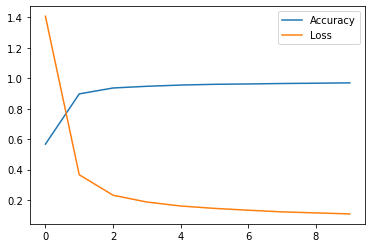

In [131]:
plt.plot(history.history['accuracy'],label='Accuracy');plt.legend()
plt.plot(history.history['loss'],label='Loss');plt.legend()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

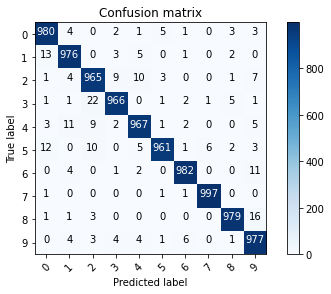

In [124]:
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, results) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

4


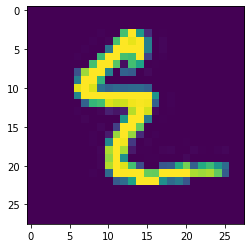

In [175]:
results = np.argmax(y_pred,axis = 1)
results = pd.Series(results,name="Label")




img=3                 
image = (X_test[img][:,:,0])
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)


print(results[img])